<a href="https://colab.research.google.com/github/Ferchisx/EjerciciosSyS/blob/Ejercicios/Cuaderno1/Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

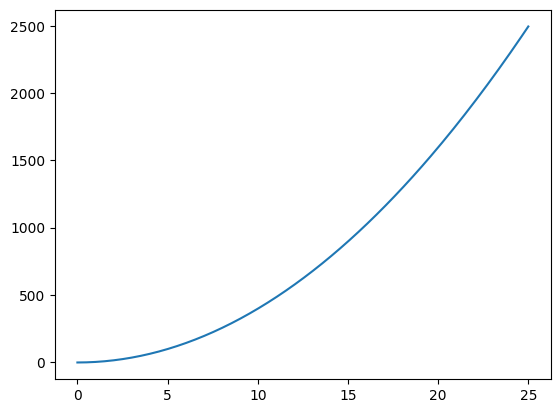

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
k=200 #muestras
ti=0  #tiempo inicial
tf=25 #tiempo final
vt=np.linspace(ti,tf,k) #vector de tiempo
a=4
b=-3
vx=a*(vt**2)+b
plt.plot(vt,vx)
#print(vt)
#print(vx)

In [ ]:
ymin=-10
ymax=10
def pendiente(x,ymin,ymax):
  xmax=max(x)
  xmin=min(x)
  m=(ymax-ymin)/(xmax-xmin)
  c=ymin-m*xmin
  vy=m*x+c
  return vy
vy=pendiente(vx,ymin,ymax)
#print(vy)

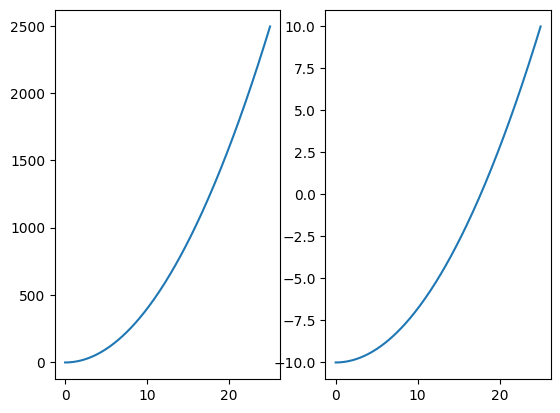

In [ ]:
plt.subplot(121)
plt.plot(vt,vx)

plt.subplot(122)
plt.plot(vt,vy)

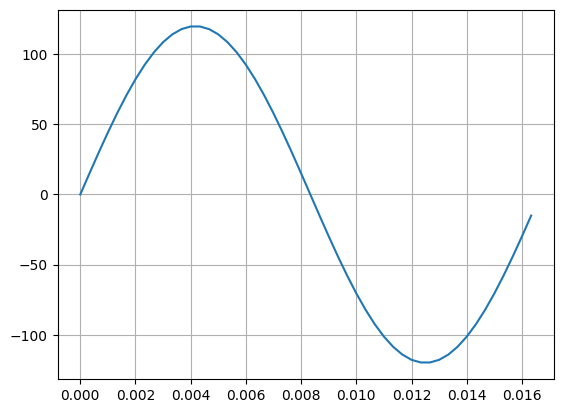

In [ ]:
A=120
Fo=60
Fs=50*Fo
To=(1/Fo)
Ts=(1/Fs)
vt2=np.arange(0,1*To,Ts)
vx2=A*np.sin(2*np.pi*vt2*Fo)
plt.plot(vt2,vx2)
plt.grid()

In [ ]:
vy2=pendiente(vx2,ymin,ymax)
#print(vy2)

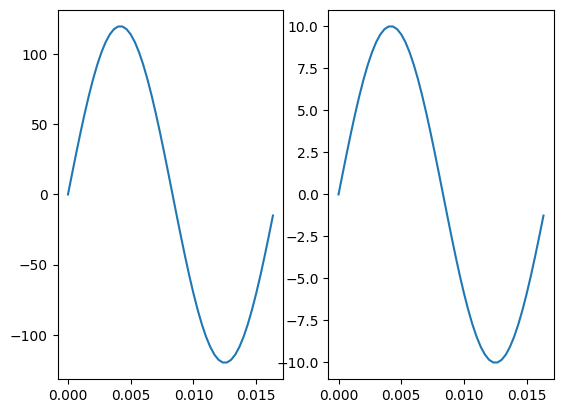

In [ ]:
plt.subplot(121)
plt.plot(vt2,vx2)

plt.subplot(122)
plt.plot(vt2,vy2)

<StemContainer object of 3 artists>

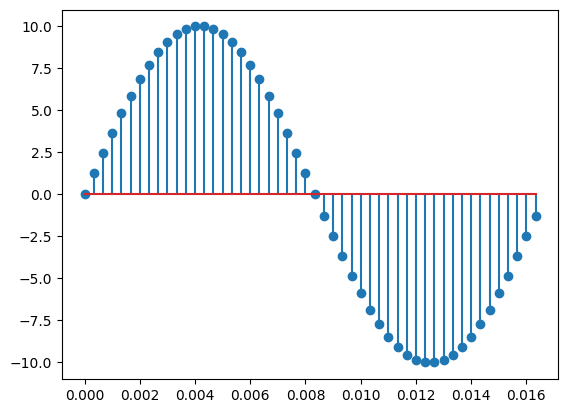

In [ ]:
plt.stem(vt2,vy2)

In [ ]:
from scipy.spatial.distance import cdist
nbits=4
rmin=-10
rmax=10
ve=np.linspace(rmin,rmax,2**nbits)
d = cdist(vy2.reshape(-1,1),ve.reshape(-1,1))  #vy2 es la amplitud
ind = np.argmin(d,axis=1)

In [ ]:
def cuantizador(yn,ve2):
  Ne=ve2.shape[0]
  dn=cdist(yn.reshape(-1,1),ve2.reshape(-1,1))
  ind=np.argmin(dn)
  return ve2[ind]

In [ ]:
for i in range(vy2.shape[0]):
  if i==0:
    yq=cuantizador(vy2[i],ve)
  else:
    yq=np.append(yq,cuantizador(vy2[i],ve))

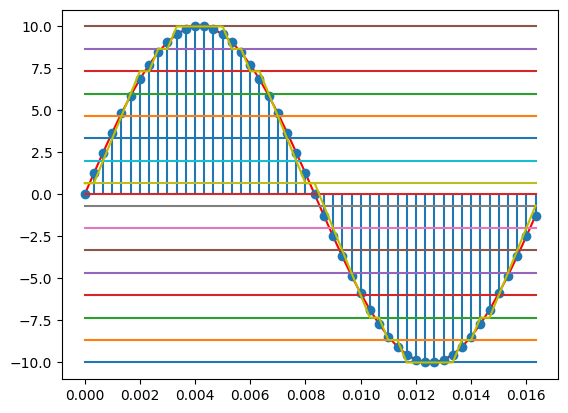

In [ ]:
plt.plot(vt2,vy2,c='r')
plt.stem(vt2,vy2)

for v in ve:
  plt.plot(vt2,v*np.ones(len(vt2)))

plt.plot(vt2,yq,c='y')